# Exercise 5: identifying the position of the San Andreas Fault using density plot functions

In this exercise, you will use all your skills in matplotlib / seaborn, plus some new ones that you will aquire by reading the documentation for two new methods. The goal is to identify the position on the map of California (plotted above) of the San Andreas Fault system (there might be more than one main fault plane here). We will assume that the epicenter of earthquakes are a good proxy for where the fault plane is.

To do this, we will:

1. Draw a density plot of the epicenter of earthquakes on top of the map of California we have used above. For this, you will need to use a new function in the Seaborn library, called 'kdeplot'. Google it and read about it to know how to use it. Then do as I did with the scatter plot above, but using your contour plot (the kdeplot, or density function). The idea of course is to use the coordinates of the Earthquakes.
2. One issue is that your dataset is very, very large. You have over 300k datapoints in it. This means drawing this plot will be very slow, and you might wait 5 to 10 minutes for your results. That's ok, but you can do better. Do you really need all these earthquakes to define the position of the San Andreas fault? I don't think so. So you will learn and use a new function in pandas, called 'sample'. Google it and see how to use it. Then try to sample different fractions of your dataset until you find a sweet spot between well defined position of the fault(s), and relatively fast plotting (might still take a minute or two).

We do this in a separate notebook also to practice importing all the relevant libraries for your work. Create as many cells as you need, keep your notebook clean, and add narrative if needed. Your notebook should be executable from the top of the notebook to the end of the notebook.

Good luck, and have fun!

In [2]:
# YOUR CODE HERE

# need to use pandas, and matplotlib.pyplot, not just matpoltlib 
# probably also numpy
# styling can be seaborn or default, but to use kdeplot you will need seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the image first 
california_img=plt.imread('img/california.png')

# also need to read the csv
caliquakes_df = pd.read_csv('Datasets/combined_eq_california_clean.csv')

# The idea of course is to use the coordinates of the Earthquakes.
# filter out those that are earthquakes 
# but not just want magnitude over 4.8 because logically small ones also indicate relationship between magnitude & distance to epicenter
caliquakes_df = caliquakes_df[caliquakes_df['type']=='earthquake']

# reducing image display size 
# use sample function to make it faster than iterating through line by line 
caliquake_10p = caliquakes_df.sample(frac=0.08)

# sns.kdeplot(x=None, y=None, )



<font color = 'magenta'> why '''.sample()''' can be used to reduce image size?<br>
I think there's also a random sample function '''random.sample()''' ? <br>
how to differ? https://www.geeksforgeeks.org/python-pandas-dataframe-sample/


In [3]:
# My solution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Some styling
sns.set_style("white")

# Read the image
california_img=plt.imread('img/california.png')

# Create the dataset
caliquakes_df = pd.read_csv("Datasets/combined_eq_california_clean.csv")

# Filter earthquakes as in previous exercise:
caliquakes_df = caliquakes_df[caliquakes_df.type == "earthquake"]

In [5]:
# My own experiment has taught me that with 10 percent of the dataset I get decent results. Sure, if I push it to 20, 40 or 100% it gets incrementlly better, 
# But at 10% I can already see where most of the earthquakes are and thus deduct the position of the faults zones.
caliquake_10p = caliquakes_df.sample(frac = 0.1)

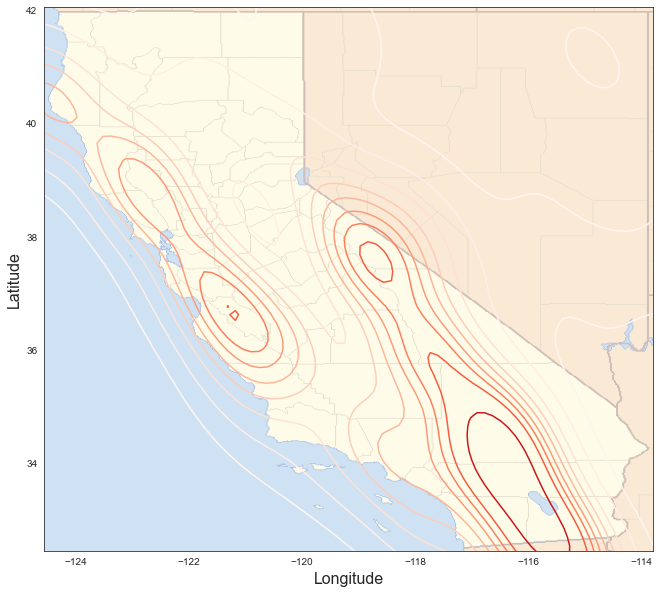

In [7]:
# Here is a little trick. To be able to control my figure size, I create a subplot of size(1,1). I can define the size of the figure, and thus of the axis that is returned
# bu the subplots function. There is no way to control figure size directly in kdeplot. Instead, I will pass my axis as a parameter to the kdeplot function.
fig, axis = plt.subplots(1,1,figsize=(13,10))

# Now I can create the kdeplot. I pass it the following arguments:
# x = the longitude of the caliquake_10p (10% data) dataframe
# y = latitude
# cmap: This is a color map. There are too many blues on the map, the reds look gaudy, so the 'Greens' have my heart on this one.
sns.kdeplot(x=caliquake_10p.longitude, y=caliquake_10p.latitude, cmap="Reds", ax = axis, fill=False)

# The rest is the same as before, just draw the map...
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)

plt.show()

# Feedback Form

In [1]:
%%html 
<iframe src="https://docs.google.com/forms/d/e/1FAIpQLSfUwq9Y2mzvmHOxseSjc_P2FdkjIx8GuhD7qCWqGrvtnmc0Ug/viewform?usp=sf_link/viewform?usp=sf_link/viewform?hl=en" width="800" height="600" frameborder="0" marginheight="0" marginwidth="0">Loading…</iframe>